In [2]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 12.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [35]:
!pip install networkx

     |████████████████████████████████| 1.6 MB 13.1 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
# https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c ,  https://towardsdatascience.com/association-rules-2-aa9a77241654

In [36]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

import networkx as nx


In [5]:
## Use this to read data directly from github
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
## Use this to read data from the csv file on local system.
#df = pd.read_csv('./data/retail_data.csv', sep=',') 
## Print top 5 rows 
df.head(5)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [7]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

Data Preprocessing
To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it’s liking. apriori module requires a dataframe that has either 0 and 1 or True and False as data. The data we have is all string (name of items), we need to One Hot Encode the data.

In [19]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [20]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 4 combinations | Sampling itemset size 4 3


,support,itemsets
0,0.425397,(Bagel)
1,0.504762,(Bread)
2,0.501587,(Cheese)
3,0.406349,(Diaper)
4,0.438095,(Eggs)
5,0.476190,(Meat)
6,0.501587,(Milk)


In [21]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
1,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
2,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
3,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
4,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148


# Visualizing results
## 1.Support vs Confidence

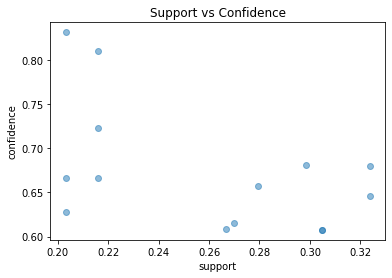

In [22]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
## 2.suppport vs lift

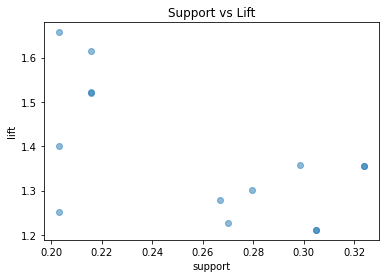

In [24]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
## 3 lift vs confidence

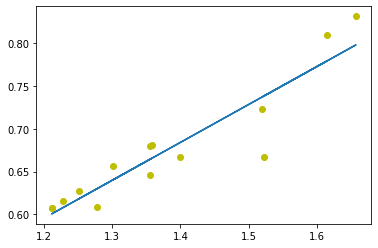

In [25]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

In [26]:
rules1=rules.sort_values('confidence',ascending=False)

In [27]:
rules1.rename(columns={'antecedents': 'from', 'consequents': 'to','confidence':'value'}, inplace=True)

rules1=rules1[['from','to','value']]

In [31]:
df1=rules1.copy()
df1['value']=df1['value']*10
df1['value']=df1['value'].astype(int)

In [40]:
df1.head(20)

,from,to,value
11,"(Meat, Milk)",(Cheese),8
8,"(Eggs, Meat)",(Cheese),8
9,"(Eggs, Cheese)",(Meat),7
1,(Eggs),(Cheese),6
2,(Meat),(Cheese),6
10,"(Meat, Cheese)",(Eggs),6
12,"(Cheese, Milk)",(Meat),6
0,(Bagel),(Bread),6
3,(Cheese),(Meat),6
13,"(Meat, Cheese)",(Milk),6


In [28]:
## grafo

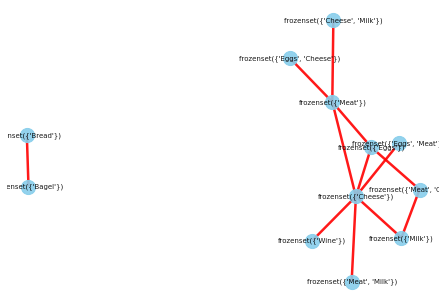

In [44]:
# Build your graph
G=nx.from_pandas_edgelist(df1, 'from', 'to', create_using=nx.Graph() )

# Custom the nodes:
nx.draw(G, 
        with_labels=True,
        font_size=7,
        linewidths=1, 
        node_color='skyblue', 
        node_size=200, 
        alpha=0.9, 
        edge_color='r', 
        width=2.5, 
        #edge_cmap=plt.cm.Blues)
        edge_cmap=plt.cm.Set2)

In [38]:
lista_grupos_MLA=list(nx.connected_components(G))

In [39]:
lista_grupos_MLA

[{frozenset({'Eggs', 'Meat'}),
  frozenset({'Wine'}),
  frozenset({'Cheese', 'Milk'}),
  frozenset({'Eggs'}),
  frozenset({'Meat'}),
  frozenset({'Cheese', 'Meat'}),
  frozenset({'Milk'}),
  frozenset({'Cheese'}),
  frozenset({'Cheese', 'Eggs'}),
  frozenset({'Meat', 'Milk'})},
 {frozenset({'Bagel'}), frozenset({'Bread'})}]